In [ ]:
pip install -U matplotlib

In [ ]:
pip install pandas

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

Analysis of the Coherence Score Annotation based on the MultiWOZ dialogues

In [8]:
df = pd.read_csv("annotation_coherence_llama3-8b_final.csv")

In [9]:
print(df)

                  id                                               text  \
0      SNG01856.json  ['am looking for a place to to stay that has c...   
1       SNG0129.json  ['Hello , I have been robbed . Can you please ...   
2       MUL2168.json  ["Hi , I 'm looking for a train that is going ...   
3      SNG01445.json  ['I was robbed a few minutes ago and need assi...   
4       MUL2105.json  ["Hi . I 'm looking for a hotel in the east . ...   
...              ...                                                ...   
10439   SNG0805.json  ["I need one in the moderate price range . I w...   
10440  SNG02198.json  ['I need a taxi to go to meghna .', 'And when ...   
10441   SNG0253.json  ['I am looking for a train to Cambridge on Sat...   
10442   MUL1076.json  ['Yes I am looking for some hotels that includ...   
10443  PMUL1046.json  ['Where is the train that arrives at 11:00 and...   

       score                                        explanation  \
0        5.0  The dialogue is co

In [10]:
df["score"].value_counts()

score
5.0    9578
4.0     704
3.0      63
2.0      48
1.0      47
Name: count, dtype: int64

In [11]:
print(df.loc[df["score"]==1.0])

                  id                                               text  \
174     SNG1155.json  ['Can you tell me about the Cambridge universi...   
251    WOZ20583.json  ["Hi , I 'm looking for good Chinese food on t...   
343    SNG01521.json  ['I need to book a taxi to arrive by 06:45 to ...   
747    SNG01964.json  ['I would like to book a popular , cheap resta...   
1070    SNG0938.json  ['Hello , I am looking for the address and pho...   
1121   SNG02171.json  ['i need a taxi pick up at london kings cross ...   
1155   SNG01773.json  ['I want to book a taxi to arrive by 02:15 to ...   
1466   WOC20171.json  ['I want to find a cheap restaurant in the eas...   
1784   SNG01882.json  ['I need a taxi to take me to the cambridge pu...   
1916   SNG02239.json  ['I am looking for a place to dine . The resta...   
2117    SNG1299.json  ["I 'm looking for a particular restaurant . I...   
2313   SSNG0227.json  ['Hi I need a cheap hotel in the three star ra...   
2482   SNG01653.json  ["I

In [12]:
print(df.loc[df["score"]==2.0])

                  id                                               text  \
74     SSNG0363.json  ["I 'm looking for information on a hotel call...   
124    PMUL0148.json  ["Yes , I 'm looking for a restaurant that ser...   
134    SNG01611.json  ['I am looking for a restaurant . The restaura...   
269    WOZ20645.json  ['I want to find an expensive restaurant and s...   
705    PMUL3863.json  ['i need a place to stay', 'OK , what area or ...   
794    WOZ20648.json  ["I would like a restaurant that serves world ...   
950     SNG1222.json  ['I am looking for information on the Kings co...   
1234   SSNG0328.json  ["I 'm looking for a hotel with one star ratin...   
1268    SNG1392.json  ["Hello , I 'm looking for a 1 star hotel with...   
1562   WOZ20328.json  ['Is there any restaurants on the south part o...   
1677    SNG1259.json  ["I need a taxi from great saint Mary's church...   
1879   WOZ20563.json  ['I am looking for a restaurant in the west pa...   
2069   PMUL1126.json  ['I

Visualizing the score values

In [13]:
score_counts = df["score"].value_counts().sort_index()

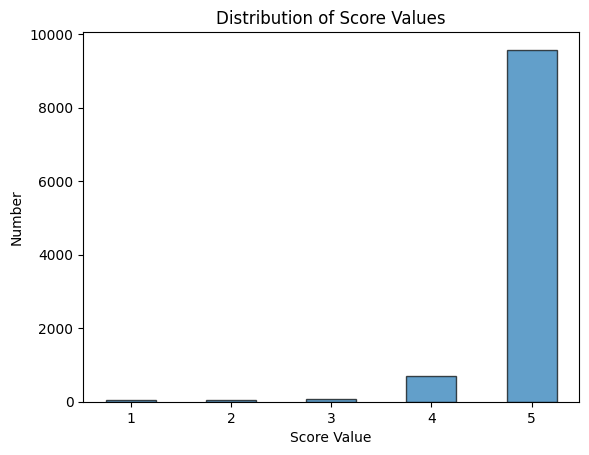

In [14]:
plt.bar(
    x=score_counts.index,  
    height=score_counts.values,  
    width=0.5,  
    align='center',  
    edgecolor="black",  
    alpha=0.7  
)

plt.xlabel("Score Value")
plt.ylabel("Number")
plt.title("Distribution of Score Values")

plt.xticks([1, 2, 3, 4, 5])

plt.show()

In [15]:
score_table = df["score"].value_counts().sort_index()

In [16]:
score_table = score_table.reset_index()
score_table.columns = ["Score", "Number"]

In [17]:
print(score_table.to_string(index=False))

 Score  Number
   1.0      47
   2.0      48
   3.0      63
   4.0     704
   5.0    9578


Filtering the dialogues with a score of 3

In [18]:
df_score_3 = df[df["score"] == 3].copy()

In [19]:
print(df_score_3)

                  id                                               text  \
51      SNG0798.json  ['Could you help me find the Cambridge Belfry ...   
137    PMUL4021.json  ['Hello , can you recommend a 0-star hotel wit...   
504    SNG02020.json  ['I need a taxi to take me to fitzbillies rest...   
533    PMUL4696.json  ['is there a nice night club in the west that ...   
581    PMUL1160.json  ['I am looking for a museum in town', 'We have...   
...              ...                                                ...   
9098   SNG01919.json  ['I need a taxi from the missing sock and I ne...   
9761   SSNG0277.json  ['I want to find some information about a hote...   
9794   PMUL1973.json  ['Can you help me find a train leaving Cambrid...   
9872   WOZ20413.json  ['I need a restaurant that serves european foo...   
10261  PMUL0963.json  ['Hi , I am planning a trip to Cambridge and n...   

       score                                        explanation  \
51       3.0  The dialogue is pa

In [20]:
df_score_3.to_csv("score_3.csv", index=False)

Coherence Score Annotation with 3-scores relabeled 

In [22]:
df_adapted = pd.read_csv("annotation_coherence_llama3-8b_adapted.csv", delimiter=";")

In [23]:
print(df_adapted)

                  id                                               text  \
0      SNG01856.json  ['am looking for a place to to stay that has c...   
1       SNG0129.json  ['Hello , I have been robbed . Can you please ...   
2       MUL2168.json  ["Hi , I 'm looking for a train that is going ...   
3      SNG01445.json  ['I was robbed a few minutes ago and need assi...   
4       MUL2105.json  ["Hi . I 'm looking for a hotel in the east . ...   
...              ...                                                ...   
10439   SNG0805.json  ["I need one in the moderate price range . I w...   
10440  SNG02198.json  ['I need a taxi to go to meghna .', 'And when ...   
10441   SNG0253.json  ['I am looking for a train to Cambridge on Sat...   
10442   MUL1076.json  ['Yes I am looking for some hotels that includ...   
10443  PMUL1046.json  ['Where is the train that arrives at 11:00 and...   

       score                                        explanation  \
0        5.0  The dialogue is co

In [24]:
df_adapted["score"].value_counts()

score
5.0    9591
4.0     728
2.0      67
1.0      54
Name: count, dtype: int64

Analysis of the Coherence Annotation based on the acts of speeches

In [25]:
df_acts = pd.read_csv("annotation_acts_llama3-8b.csv")

In [26]:
print(df_acts)

                  id                                               text  \
0      SNG01856.json  ['user provides information to specify goal (h...   
1       SNG0129.json  ['user provides information to specify goal (p...   
2       MUL2168.json  ['user provides information to specify goal (t...   
3      SNG01445.json  ['user provides information to specify goal (p...   
4       MUL2105.json  ['user provides information to specify goal (h...   
...              ...                                                ...   
10434  PMUL0389.json  ['user provides information to specify goal (h...   
10435   MUL0212.json  ['user provides information to specify goal (r...   
10436   MUL2604.json  ['user provides information to specify goal (a...   
10437   MUL0091.json  ['user provides information to specify goal (r...   
10438   MUL1268.json  ['user provides information to specify goal (r...   

       coherence  
0            1.0  
1            0.0  
2            1.0  
3            0.0  
4   

In [27]:
df_acts["coherence"].value_counts()

coherence
1.0     8404
0.0     2026
3.0        1
5.0        1
4.0        1
12.0       1
2.0        1
Name: count, dtype: int64

In [29]:
df_acts = df_acts[df_acts["coherence"].isin([1.0, 0.0])]

In [30]:
df_acts["coherence"].value_counts()

coherence
1.0    8404
0.0    2026
Name: count, dtype: int64

In [31]:
df_acts.to_csv("annotation_acts_llama3-8b.csv", index=False)

Comparison of the annotations

In [32]:
merged_df = pd.merge(df, df_acts, on="id", how="outer")

In [33]:
print(merged_df)

                  id                                             text_x  \
0       AHY0529.json  ["Hello , I 'm looking for a train . The train...   
1      ENTM0404.json  ['Do you know what this city might have in ent...   
2      HJHY0502.json  ['Do you have any museums there ?', 'We have s...   
3      HMND4567.json  ["I 'm also looking for a hotel to stay in . I...   
4      HMUG2179.json  ["I 'm looking for a hotel , can you help ?", ...   
...              ...                                                ...   
10597   WZ00545.json  ['I would like a restaurant in the west part o...   
10598   WZ20377.json  ['I would like an expensive restaurant in the ...   
10599  WZJ61093.json  ['Hello , I am looking for a restaurant on the...   
10600  WZKJ0478.json  ["Can you help me find a restaurant in the sou...   
10601  WZM14123.json  ['Can you direct me towards a moderately price...   

       score                                        explanation  \
0        5.0  The dialogue is co

In [34]:
cleaned_df = merged_df.dropna(subset=["score", "coherence"]).reset_index(drop=True)

In [35]:
print(cleaned_df)

                  id                                             text_x  \
0       MUL0001.json  ["I 'd really like to take my client out to a ...   
1       MUL0002.json  ['Looking for a place to eat in the city cente...   
2       MUL0003.json  ["I 'm looking for a place to stay . It needs ...   
3       MUL0004.json  ["I 'm looking for a restaurant in Cambridge c...   
4       MUL0005.json  ['Is there any expensive seafood restaurant in...   
...              ...                                                ...   
10263  WOZ20671.json  ['Hello , I am looking for a cheap restaurant ...   
10264  WOZ20672.json  ['I want to find a restaurant in the south par...   
10265  WOZ20673.json  ['I am looking for a restaurant that serves Mo...   
10266  WOZ20674.json  ["Hi .   I 'm trying to find a good restaurant...   
10267  WOZ20675.json  ['I am interested in a restaurant located in t...   

       score                                        explanation  \
0        5.0  The dialogue is co

In [36]:
cleaned_df["score"] = cleaned_df["score"].apply(lambda x: 1.0 if x >= 4.0 else 0.0)

In [37]:
mismatched_rows = cleaned_df[cleaned_df["score"] != cleaned_df["coherence"]]
print(len(mismatched_rows))

2049
